In [251]:
import numpy as np
pd.options.display.float_format = '{:,.4f}'.format

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as XGB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

try:
    import shap
except ImportError:
    import subprocess
    subprocess.check_call(['pip', 'install', 'shap'])
    import shap

In [252]:
df = pd.read_csv('data.csv')

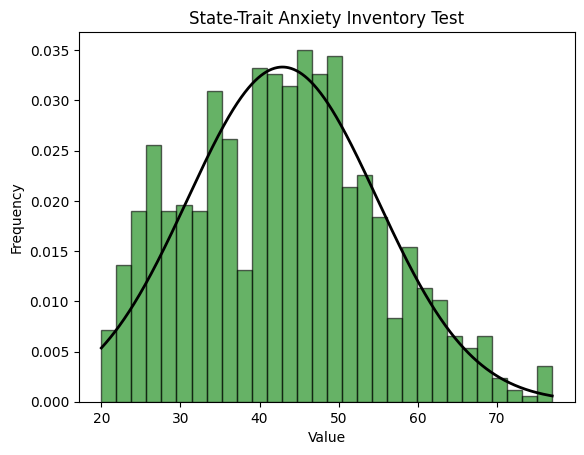

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data points
data = df['stai_t']

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Generate a range of values for the x-axis
x = np.linspace(min(data), max(data), 1000)

# Generate the normal distribution curve
p = norm.pdf(x, mean, std_dev)

# Plot the histogram of the data points
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
plt.title('State-Trait Anxiety Inventory Test')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Chi-Square Test for Psychological Therapy and Gender: chi2=23.484975476810813, p-value=7.948814670970252e-06
Pearson Correlation between Empathy and Stress: correlation=0.13360935283240385, p-value=6.627772801280429e-05
                            OLS Regression Results                            
Dep. Variable:                 stai_t   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     24.61
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           8.40e-07
Time:                        19:12:54   Log-Likelihood:                -3444.5
No. Observations:                 886   AIC:                             6893.
Df Residuals:                     884   BIC:                             6903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                

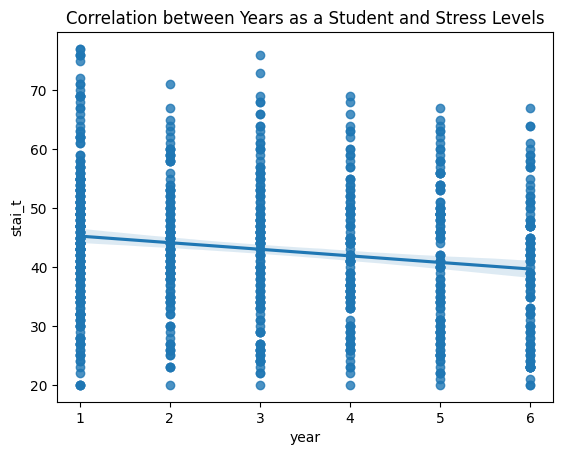

Adjusted p-values after Bonferroni correction: [2.38464440e-05 1.98833184e-04 2.51917820e-06]


<ipython-input-254-6ffe5a92ef59>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_vals = [p_val, p_val_pearson, results.pvalues[1]]


In [254]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
# 1. Correlation Between Psychological Therapy and Gender (Chi-Square Test)
therapy_gender_crosstab = pd.crosstab(df['sex'], df['psyt'])
chi2, p_val, dof, expected = stats.chi2_contingency(therapy_gender_crosstab)
print(f"Chi-Square Test for Psychological Therapy and Gender: chi2={chi2}, p-value={p_val}")

# 2. Correlation Between Empathy Score and Stress (Pearson's Correlation)
df['empathy_score'] = df['qcae_cog'] + df['qcae_aff']
corr_pearson, p_val_pearson = stats.pearsonr(df['empathy_score'], df['stai_t'])
print(f"Pearson Correlation between Empathy and Stress: correlation={corr_pearson}, p-value={p_val_pearson}")

# 3. Correlation Between Years as a Student and Stress Levels (Linear Regression)
X = df['year']
y = df['stai_t']

# Add a constant term for the intercept
X_with_const = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X_with_const)
results = model.fit()

# Display the regression summary
print(results.summary())

# Plotting Correlation for Visual Aid (Optional)
sns.regplot(x='year', y='stai_t', data=df)
plt.title('Correlation between Years as a Student and Stress Levels')
plt.show()

# Multiple Testing Correction (Bonferroni correction for p-values)
p_vals = [p_val, p_val_pearson, results.pvalues[1]]
adjusted_pvals = multipletests(p_vals, method='bonferroni')[1]
print(f"Adjusted p-values after Bonferroni correction: {adjusted_pvals}")

Conclusion: The data is distributed normally.

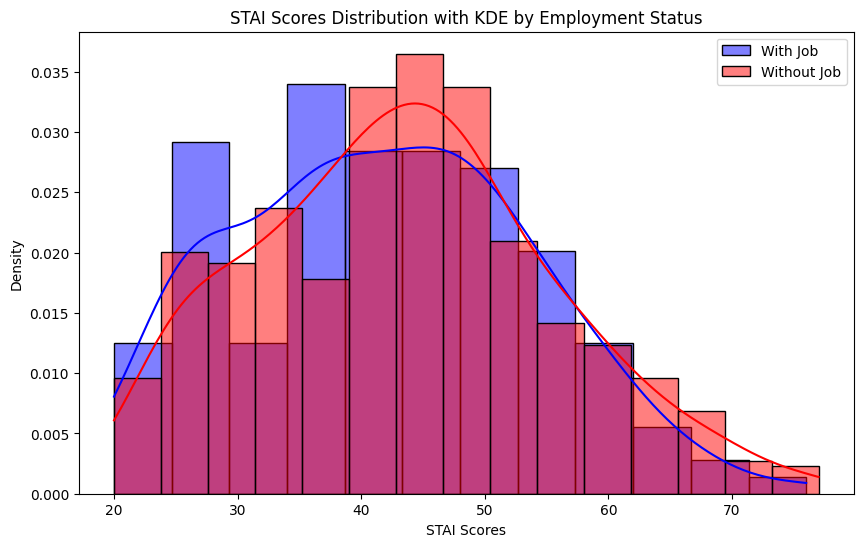

In [255]:
# Plot histograms and KDE for both groups
plt.figure(figsize=(10, 6))

# Subset data
students_with_job = df[df['job'] == 1]['stai_t']
students_without_job = df[df['job'] == 0]['stai_t']

# Histogram and KDE plot
sns.histplot(students_with_job, kde=True, color='blue', label='With Job', stat="density")
sns.histplot(students_without_job, kde=True, color='red', label='Without Job', stat="density")

plt.title('STAI Scores Distribution with KDE by Employment Status')
plt.xlabel('STAI Scores')
plt.ylabel('Density')
plt.legend()
plt.show()

In [256]:
print(students_with_job.mean())
print(students_with_job.std())
print(students_with_job.min())
print(students_with_job.max())
print(students_without_job.mean())
print(students_without_job.std())
print(students_without_job.min())
print(students_without_job.max())

41.86731391585761
11.81479919842859
20
76
43.45060658578856
12.039059859682816
20
77


In [257]:
students_without_job.mean()

43.45060658578856

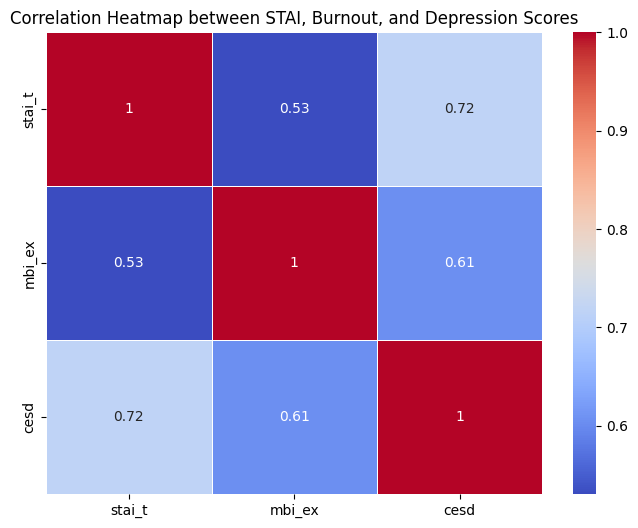

In [258]:
# Compute the correlation matrix
corr = df[['stai_t', 'mbi_ex', 'cesd']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between STAI, Burnout, and Depression Scores')
plt.show()


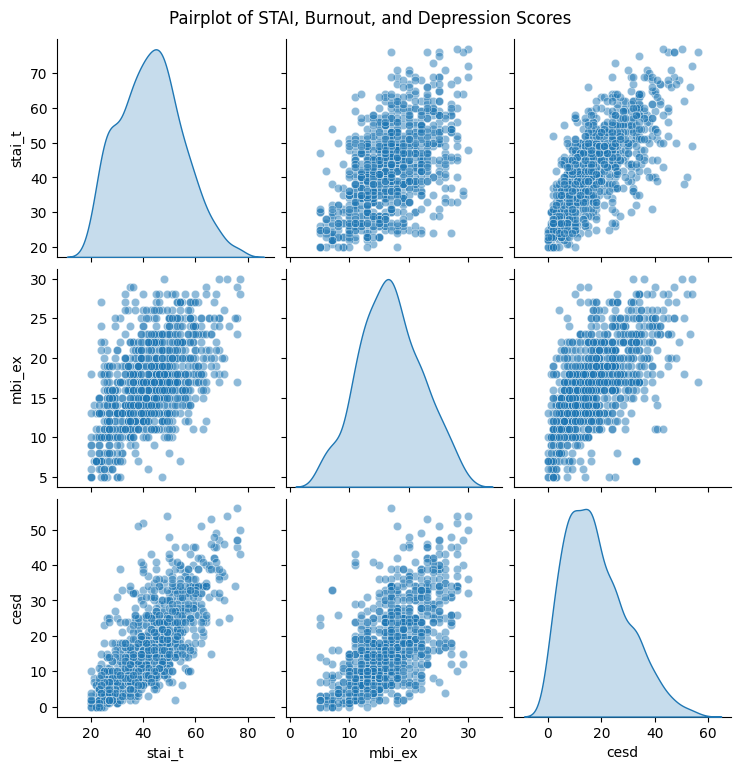

In [259]:
# Create a pairplot for mental health variables
sns.pairplot(df[['stai_t', 'mbi_ex', 'cesd']], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of STAI, Burnout, and Depression Scores', y=1.02)
plt.show()

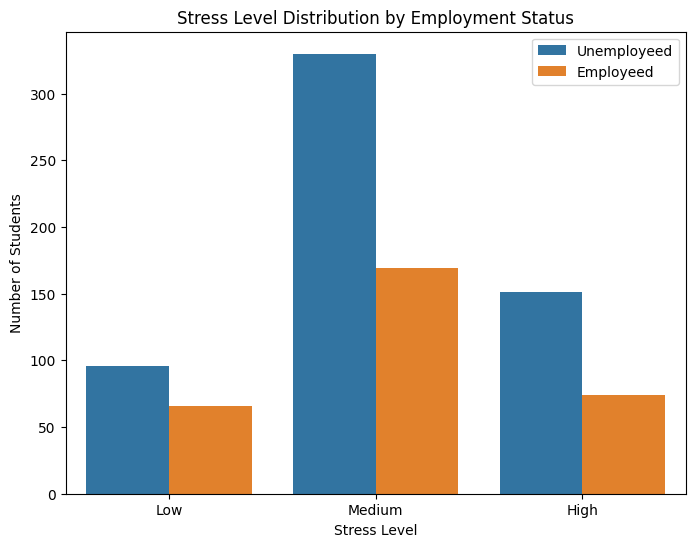

In [260]:
# Categorize STAI scores into low, medium, and high stress levels
df['stress_level'] = pd.cut(df['stai_t'], bins=[0, 30, 50, 80], labels=['Low', 'Medium', 'High'])

# Create a bar plot showing the distribution of stress levels for each employment status
plt.figure(figsize=(8, 6))
sns.countplot(x='stress_level', hue='job', data=df)
plt.title('Stress Level Distribution by Employment Status')
plt.xlabel('Stress Level')
plt.ylabel('Number of Students')
plt.legend(labels=['Unemployeed', 'Employeed'])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 stai_t   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     328.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.96e-143
Time:                        19:13:04   Log-Likelihood:                -3124.7
No. Observations:                 886   AIC:                             6257.
Df Residuals:                     882   BIC:                             6277.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4467      0.976     26.063      0.0

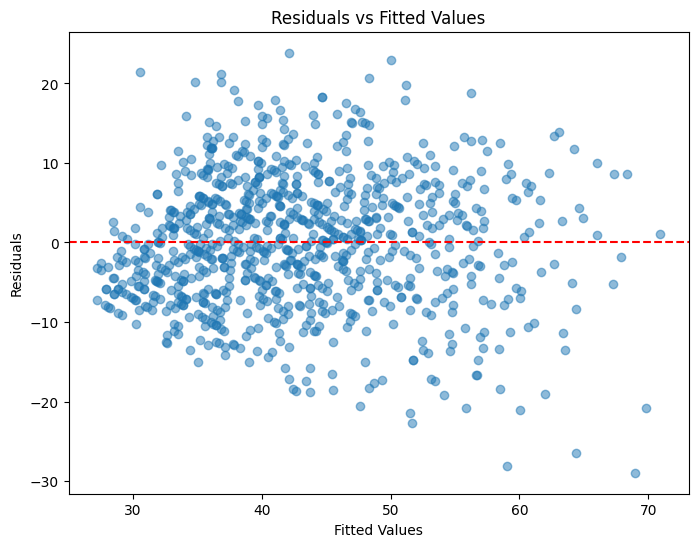

In [261]:
import statsmodels.api as sm

# Define the predictor variables and the target variable
X = df[['job', 'mbi_ex', 'cesd']]  # You can add more variables if necessary
y = df['stai_t']

# Add a constant to the predictor variables (intercept)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Plot residuals vs fitted values to check model fit
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 stai_t   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     21.41
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.16e-13
Time:                        19:13:04   Log-Likelihood:                -3425.6
No. Observations:                 886   AIC:                             6859.
Df Residuals:                     882   BIC:                             6878.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     33

<Figure size 800x600 with 0 Axes>

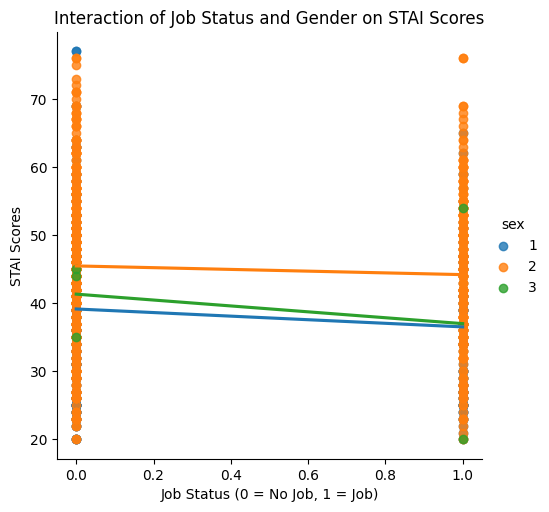

In [262]:
# Add interaction term between job and gender
df['job_gender_interaction'] = df['job'] * df['sex']

# Define the predictor variables and the target variable
X_interaction = df[['job', 'sex', 'job_gender_interaction']]  # Interaction term included
y_interaction = df['stai_t']

# Add a constant to the predictor variables
X_interaction = sm.add_constant(X_interaction)

# Fit the OLS regression model with interaction term
model_interaction = sm.OLS(y_interaction, X_interaction).fit()

# Print the summary of the model
print(model_interaction.summary())

# Plot interaction effect (for visualization)
plt.figure(figsize=(8, 6))
sns.lmplot(x='job', y='stai_t', hue='sex', data=df, ci=None)
plt.title('Interaction of Job Status and Gender on STAI Scores')
plt.xlabel('Job Status (0 = No Job, 1 = Job)')
plt.ylabel('STAI Scores')
plt.show()


We'll try to check the assumptions for a T-Test (Parametric Test) to see if there's a difference in means between the population of Employeed and Non-Employeed students

In [263]:
from statsmodels.stats.power import TTestIndPower

# Parameters for power analysis
effect_size = 0.5
alpha = 0.005
power = 0.99

# Calculate the required sample size
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
print(f'Required sample size: {sample_size}')

Required sample size: 212.79215035201514


To use T-Test we need to validate the assumptions:
1. Sample population is Normally distributed for each group [We'll use Kolmogorov-Smirnov]
2. The Variance of Sample Population for each group is the same. [We'll use Levene]

In [264]:
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """

    n = len(data)

    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

    print("p value:%.4f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [265]:
def check_variance_homogeneity(group1, group2):
    test_stat, p_val = stats.levene(group1, group2)
    print("p value:%.4f" % p_val)
    if p_val <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [266]:
high_anx  = df[df['stai_t'] > 45]

high_anx[high_anx['psyt'] == 1]

,id,age,year,sex,glang,part,job,stud_h,health,psyt,...,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,empathy_score,stress_level,job_gender_interaction
13,36,21,2,2,1,1,0,51,2,1,...,19,0.4286,19,48,19,11,20,90,Medium,0
22,55,22,3,2,1,1,0,30,4,1,...,26,0.7857,30,47,26,19,20,107,Medium,0
23,57,22,3,1,1,1,0,33,4,1,...,28,0.5476,12,50,15,8,22,90,Medium,0
25,61,20,1,2,102,0,1,11,3,1,...,19,0.6667,28,51,17,14,21,94,High,2
31,68,23,4,2,1,1,1,7,4,1,...,26,0.8333,24,64,20,13,21,103,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,1680,23,4,1,1,1,1,22,3,1,...,23,0.8095,24,62,18,20,17,87,High,1
843,1702,25,6,2,90,1,0,18,4,1,...,18,0.6429,19,52,13,12,20,74,High,0
862,1733,21,4,2,1,1,0,50,2,1,...,19,0.6667,34,54,27,12,23,106,High,0
867,1742,19,1,2,1,1,0,18,3,1,...,32,0.6667,34,75,25,12,16,108,High,0


In [267]:
job_df  = df[df['job'] == 1]
no_job_df = df[df['job'] == 0]

stai_t_job = job_df['stai_t'].dropna()
stai_t_no_job = no_job_df['stai_t'].dropna()

check_normality(stai_t_job)
check_normality(stai_t_no_job)
check_variance_homogeneity(stai_t_job, stai_t_no_job)

p value:0.2671
Fail to reject null hypothesis >> The data is normally distributed
p value:0.4644
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8623
Fail to reject null hypothesis >> The variances of the samples are same.


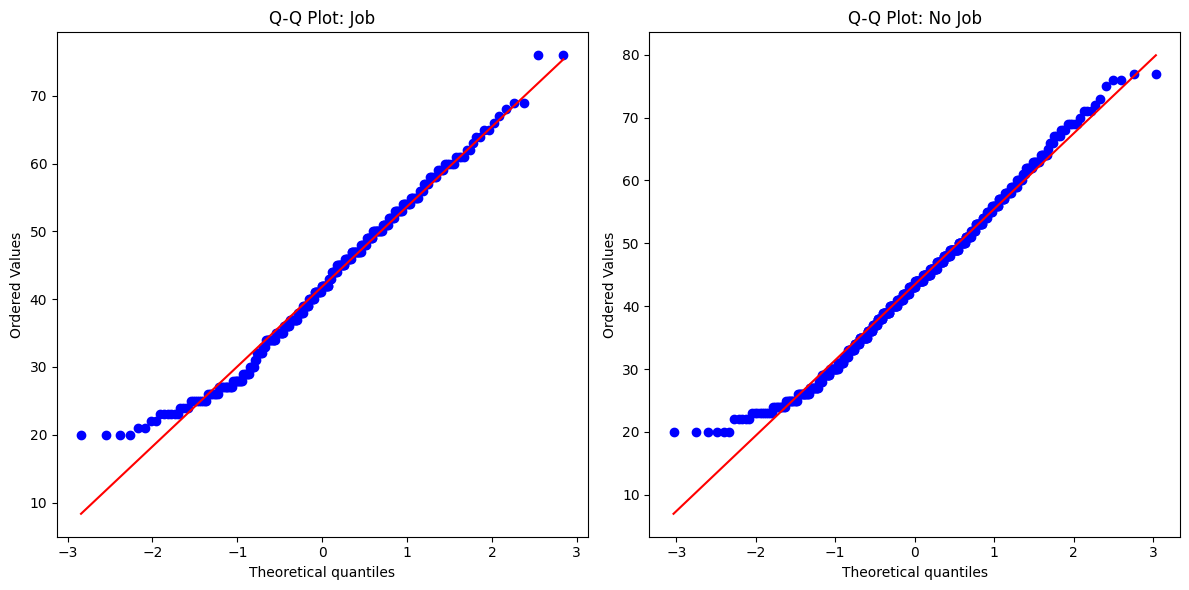

In [268]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plots for visual inspection of normality
plt.figure(figsize=(12, 6))

# Q-Q plot for the 'job' group
plt.subplot(1, 2, 1)
stats.probplot(stai_t_job, dist="norm", plot=plt)
plt.title('Q-Q Plot: Job')

# Q-Q plot for the 'no_job' group
plt.subplot(1, 2, 2)
stats.probplot(stai_t_no_job, dist="norm", plot=plt)
plt.title('Q-Q Plot: No Job')

plt.tight_layout()
plt.show()

In [269]:
df[df['psyt'] == 0]

,id,age,year,sex,glang,part,job,stud_h,health,psyt,...,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,empathy_score,stress_level,job_gender_interaction
0,2,18,1,1,120,1,0,56,3,0,...,17,0.7381,34,61,17,13,20,89,High,0
1,4,26,4,1,1,1,0,20,4,0,...,22,0.6905,7,33,14,11,26,92,Medium,0
2,9,21,3,2,1,0,0,36,3,0,...,17,0.6905,25,73,24,7,23,103,High,0
3,10,21,2,2,1,0,1,51,5,0,...,18,0.8333,17,48,16,10,21,85,Medium,2
4,13,21,3,1,1,1,0,22,4,0,...,21,0.6905,14,46,22,14,23,86,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1780,20,2,2,1,1,0,20,5,0,...,16,0.7381,3,32,13,5,29,98,Medium,0
881,1781,21,2,1,1,1,0,45,3,0,...,28,0.6190,41,39,23,4,34,102,Medium,0
882,1785,20,2,2,1,0,0,13,3,0,...,21,0.8095,26,41,17,5,24,107,Medium,0
883,1787,19,1,1,1,0,0,50,5,0,...,24,0.5476,14,45,15,8,31,81,Medium,0


P-Value for each of these assumptions is high which means that we can go ahead and perform T-Test.

In [270]:
stai_t_no_job.to_numpy()

array([61, 33, 73, 46, 56, 43, 32, 38, 48, 45, 39, 56, 45, 30, 44, 51, 47,
       50, 72, 45, 48, 55, 34, 35, 40, 64, 48, 59, 42, 43, 47, 28, 35, 59,
       58, 29, 31, 54, 34, 38, 46, 44, 49, 44, 69, 76, 51, 22, 56, 41, 42,
       31, 46, 49, 60, 58, 34, 44, 62, 68, 40, 41, 30, 47, 47, 40, 34, 44,
       56, 25, 48, 50, 22, 32, 35, 59, 34, 77, 26, 48, 51, 37, 46, 39, 43,
       35, 62, 26, 27, 38, 25, 29, 53, 41, 69, 59, 48, 57, 35, 63, 46, 25,
       51, 42, 54, 40, 46, 44, 47, 30, 26, 42, 64, 26, 27, 29, 32, 47, 45,
       51, 41, 31, 40, 65, 38, 30, 24, 30, 24, 42, 56, 32, 43, 40, 60, 35,
       43, 24, 39, 49, 71, 55, 40, 51, 49, 40, 37, 39, 26, 39, 55, 29, 55,
       63, 48, 58, 46, 35, 53, 37, 28, 49, 67, 50, 60, 57, 26, 24, 31, 71,
       58, 44, 41, 24, 50, 68, 22, 59, 45, 59, 45, 29, 53, 32, 36, 34, 37,
       31, 26, 43, 56, 29, 56, 51, 46, 50, 47, 53, 44, 43, 23, 41, 44, 44,
       45, 39, 32, 34, 23, 63, 49, 30, 38, 42, 42, 38, 62, 49, 45, 50, 28,
       43, 36, 36, 46, 30

In [271]:
ttest, p_value = stats.ttest_ind(stai_t_job, stai_t_no_job, alternative='less')
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.03037467
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0152
Reject null hypothesis


In [272]:
stai_t_job.mean()

41.86731391585761

In [273]:
# Check normality
shapiro_job = stats.shapiro(stai_t_job)
shapiro_no_job = stats.shapiro(stai_t_no_job)

# Check homogeneity of variances
levene_test = stats.levene(stai_t_job, stai_t_no_job)

# Perform the t-test
t_test = stats.ttest_ind(stai_t_job, stai_t_no_job, equal_var=True, alternative='less')

# Output the results
shapiro_job, shapiro_no_job, levene_test, t_test

(ShapiroResult(statistic=0.9830915936858918, pvalue=0.0010553706849654486),
 ShapiroResult(statistic=0.9871148076990156, pvalue=5.65165726492308e-05),
 LeveneResult(statistic=0.030114956228608665, pvalue=0.862269379541829),
 TtestResult(statistic=-1.8777139545160804, pvalue=0.030374670387246408, df=884.0))

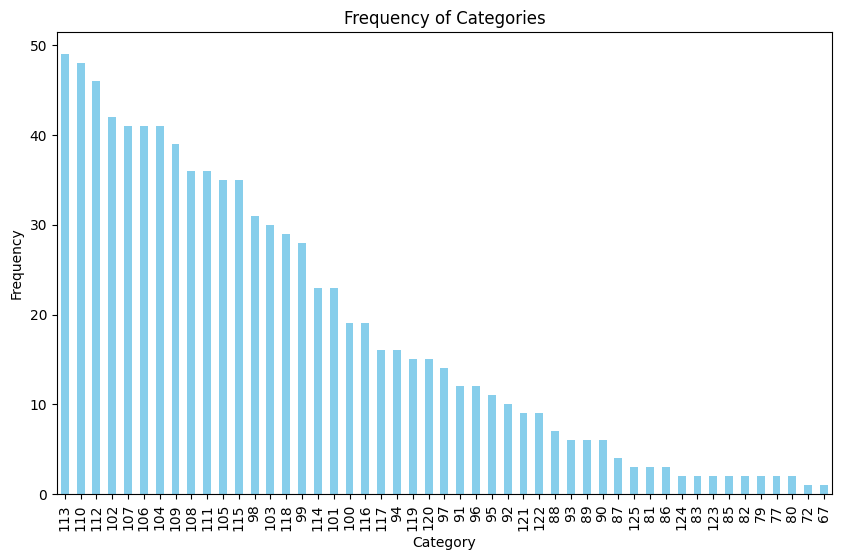

In [274]:
plt.figure(figsize=(10, 6))
category_counts = df['jspe'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [275]:
psyt = df[df['stai_t'] > 45]

In [276]:
sex = df[df['stai_t'] > 45]

In [277]:
psyt

,id,age,year,sex,glang,part,job,stud_h,health,psyt,...,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,empathy_score,stress_level,job_gender_interaction
0,2,18,1,1,120,1,0,56,3,0,...,17,0.7381,34,61,17,13,20,89,High,0
2,9,21,3,2,1,0,0,36,3,0,...,17,0.6905,25,73,24,7,23,103,High,0
3,10,21,2,2,1,0,1,51,5,0,...,18,0.8333,17,48,16,10,21,85,Medium,2
4,13,21,3,1,1,1,0,22,4,0,...,21,0.6905,14,46,22,14,23,86,Medium,0
5,14,26,5,2,1,1,1,10,2,0,...,17,0.6905,14,56,18,15,18,85,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1762,21,1,2,1,0,1,45,3,0,...,25,0.6190,39,57,23,13,20,95,High,2
873,1764,25,6,1,1,1,0,2,2,0,...,29,0.7857,20,53,22,12,15,93,High,0
876,1775,24,5,2,1,1,1,30,3,0,...,19,0.7143,15,50,17,19,22,87,Medium,2
877,1776,25,2,1,1,1,0,30,3,0,...,20,0.8810,24,53,17,14,24,96,High,0


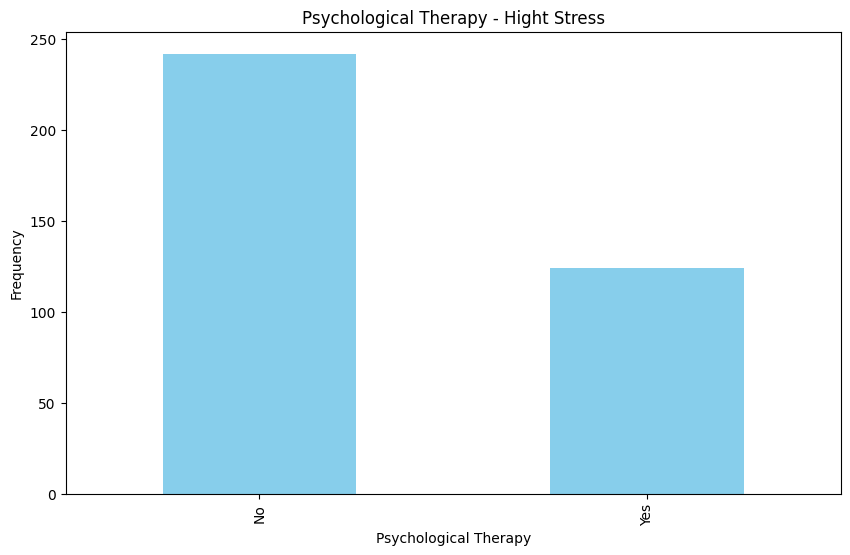

In [278]:
plt.figure(figsize=(10, 6))
category_counts = psyt['psyt'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Psychological Therapy - Hight Stress')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Psychological Therapy')
plt.ylabel('Frequency')
plt.show()

In [279]:
psyt['sex'].value_counts()

,count
sex,
2,294
1,71
3,1


In [280]:
df['sex'].value_counts()

,count
sex,
2,606
1,275
3,5


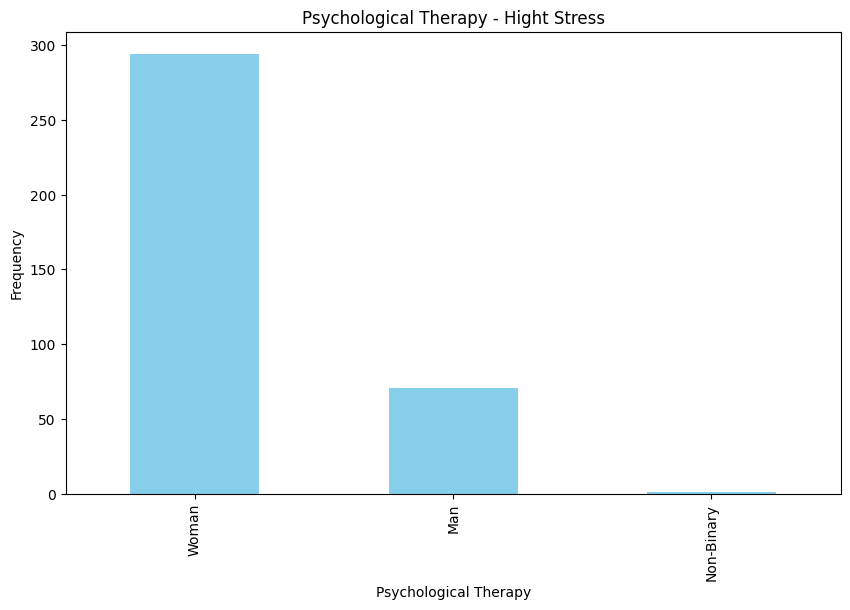

In [281]:
plt.figure(figsize=(10, 6))
category_counts = psyt['sex'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Psychological Therapy - Hight Stress')
plt.xticks([0,1,2], ['Woman', 'Man', 'Non-Binary'])
plt.xlabel('Psychological Therapy')
plt.ylabel('Frequency')
plt.show()

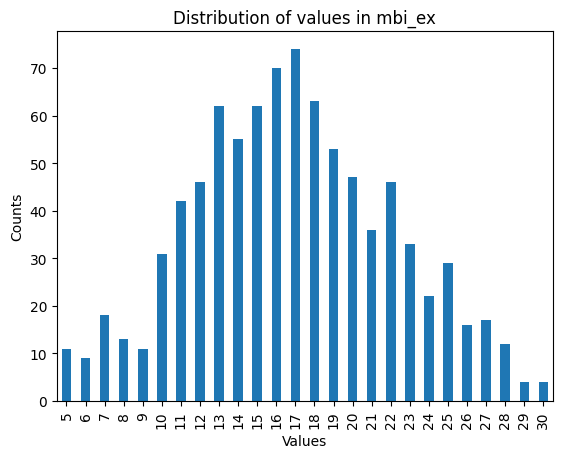

In [282]:
# Maslach Burnout Inventory-Exhaustion scale of the participant.

mbi_ex_dist = df['mbi_ex'].value_counts().sort_index()
mbi_ex_dist.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of values in mbi_ex')
plt.show()


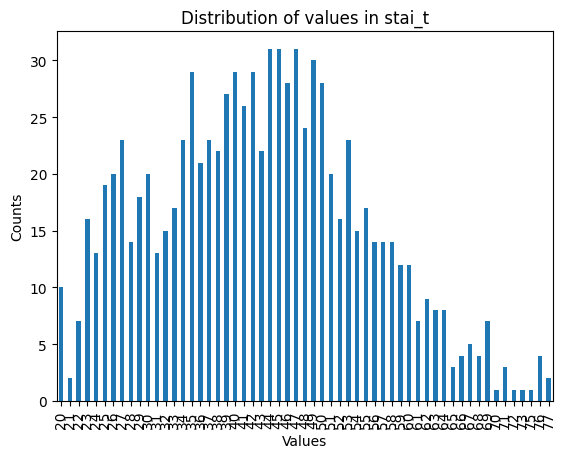

In [283]:
# Maslach Burnout Inventory-Exhaustion scale of the participant.

mbi_ex_dist = df['stai_t'].value_counts().sort_index()
mbi_ex_dist.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of values in stai_t')
plt.show()

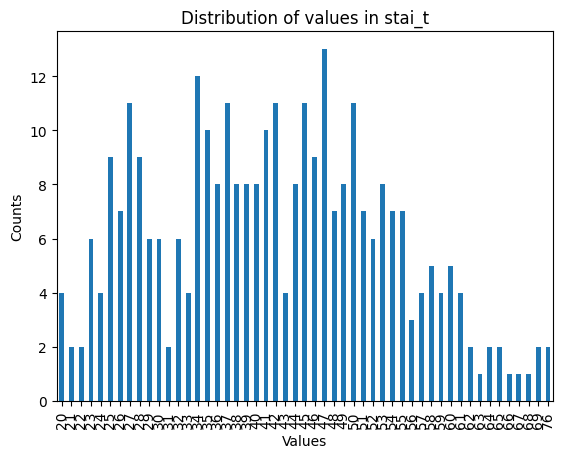

In [284]:

stai_t_job = df[df['job'] == 1]
mbi_ex_dist = stai_t_job['stai_t'].value_counts().sort_index()
mbi_ex_dist.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of values in stai_t')
plt.show()

In [285]:
job_dist = df['job'].value_counts()
print(job_dist)

job
0    577
1    309
Name: count, dtype: int64


#### **Heatmap of correlations between numeric columns in the DataFrame**

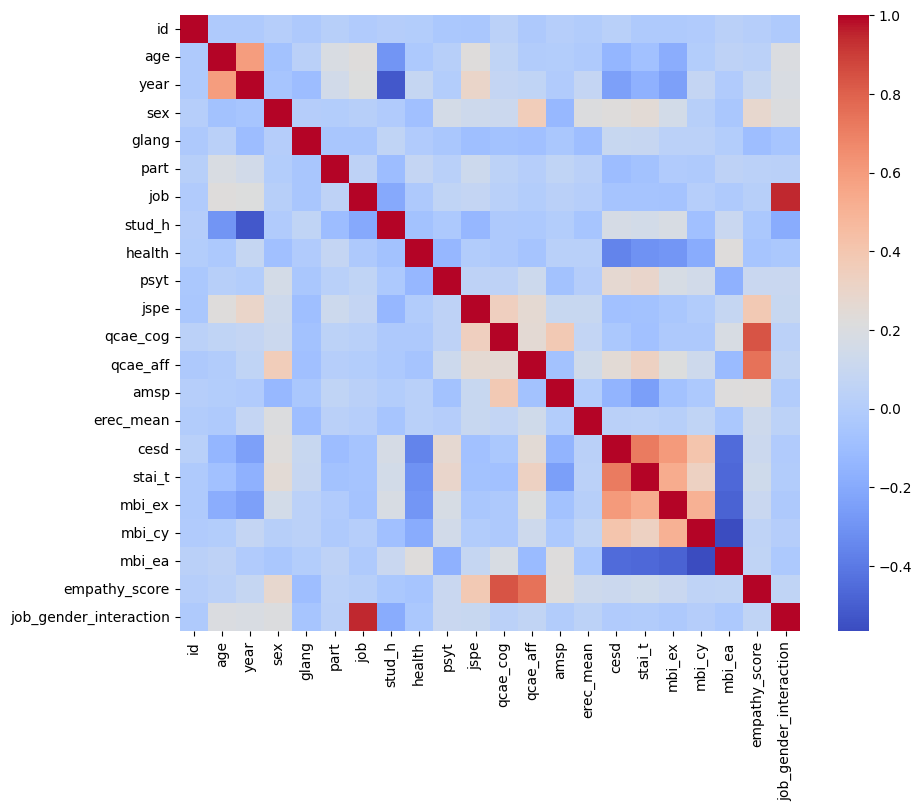

In [286]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

---
#**Machine Learning Classifier Algorithms**

In [287]:
# Split data into features and target variable
X = df.drop(['stai_t', 'stress_level'], axis=1)
y = df['stress_level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [288]:
# Define the models and their names
model_names = ['XGBoost', 'Gradient Boosting', 'KNN']
models = [
    XGBClassifier(learning_rate=0.1, n_estimators=300, max_depth=5, random_state=101),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    KNeighborsClassifier(n_neighbors=5)
]

In [289]:
# Perform k-fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

results = {}
for model_name, model in zip(model_names, models):
    accuracy_sum = 0
    precision_sum = 0
    recall_sum = 0
    f1_sum = 0

    for train_index, test_index in kf.split(X_train):
        # Split the data for this fold
        X_train_fold, X_valid = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_valid = y_train.iloc[train_index], y_train.iloc[test_index]

        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_valid_scaled = scaler.transform(X_valid)

        # Encode categorical labels to numerical values
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train_fold)

        # Fit the model using encoded labels
        model.fit(X_train_scaled, y_train_encoded)

        # Make predictions and calculate metrics
        y_pred = model.predict(X_valid_scaled)

        # Decode numerical predictions back to categorical labels
        y_pred_decoded = le.inverse_transform(y_pred)


        accuracy_sum += accuracy_score(y_valid, y_pred_decoded)
        precision_sum += precision_score(y_valid, y_pred_decoded, average='weighted', zero_division=0)
        recall_sum += recall_score(y_valid, y_pred_decoded, average='weighted')
        f1_sum += f1_score(y_valid, y_pred_decoded, average='weighted')

    # Calculate average metrics for this model
    results[model_name] = {
        'Accuracy': accuracy_sum / k,
        'Precision': precision_sum / k,
        'Recall': recall_sum / k,
        'F1-Score': f1_sum / k
    }

In [290]:
results_df = pd.DataFrame(results)

results_df = results_df.T.rename(
    columns={
        "Accuracy": "Accuracy",
        "Precision": "Precision",
        "Recall": "Recall",
        "F1-Score": "F1-Score",
    }
)

print(results_df)

                   Accuracy  Precision  Recall  F1-Score
XGBoost              0.6574     0.6672  0.6574    0.6516
Gradient Boosting    0.6738     0.6799  0.6738    0.6698
KNN                  0.6061     0.6124  0.6061    0.5940


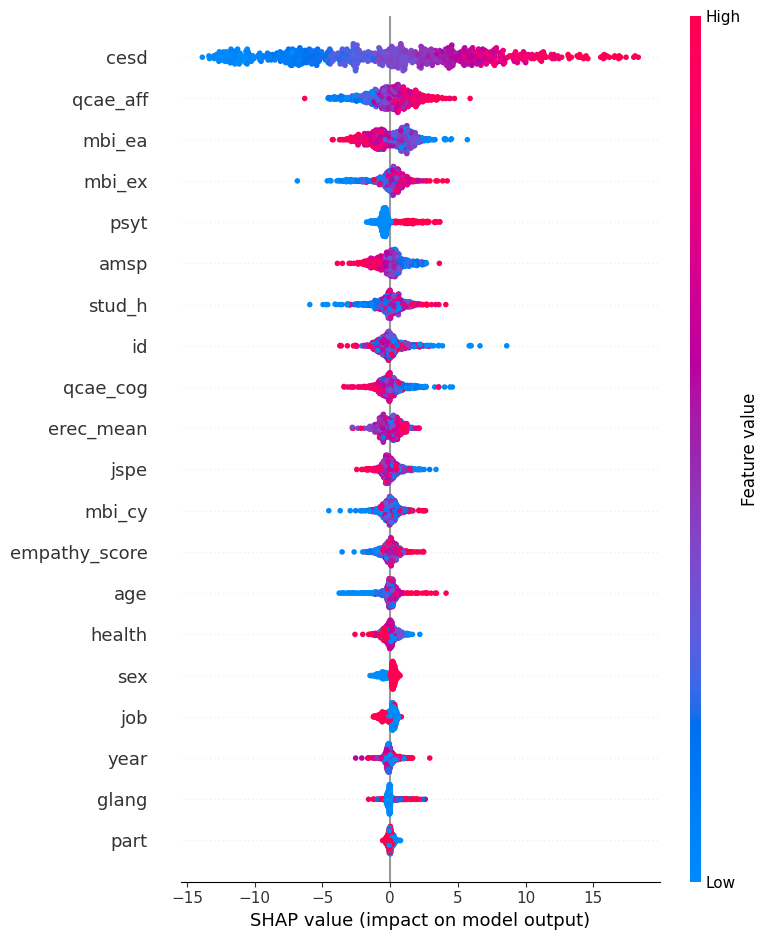

In [250]:
# For XGBoost Regressor
# Split data into training and testing sets
y = df['stai_t']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model on the entire training set
model_xgb_reg = XGBRegressor(learning_rate=0.1, n_estimators=300, max_depth=5, random_state=101)
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train)

model_xgb_reg.fit(X_train_scaled, y_train)

# Create a TreeExplainer object
explainer_xgb_reg = shap.TreeExplainer(model_xgb_reg)

# Calculate SHAP values
shap_values_xgb_reg = explainer_xgb_reg.shap_values(X_train_scaled)

# Summary plot of feature importance
shap.summary_plot(shap_values_xgb_reg, X_train_scaled, feature_names=X_train.columns)



In [291]:
X_train_scaled

array([[ 0.85394558, -1.04183104, -1.19430634, ...,  1.7087026 ,
         2.67409966, -0.70948504],
       [ 0.66988836, -0.11066753, -0.62641763, ..., -1.75819522,
         0.41058006, -0.70948504],
       [ 0.96514681, -0.42105537, -0.62641763, ...,  1.27534037,
        -0.23613983, -0.70948504],
       ...,
       [ 1.59784349,  1.44127166,  1.0772485 , ...,  0.40861592,
         0.30279341,  0.45355208],
       [-0.07400954, -1.35221888, -1.19430634, ..., -0.24142742,
        -0.02056653, -0.70948504],
       [-1.32214753,  0.19972031, -0.05852892, ...,  1.05865926,
         0.73394   , -0.70948504]])